# Fake News Classifier using a variety of classifiers

## I. Introduction

### 1. Domain-specific area

##### Domain area – Fake News Classification (Classifying fake from real news stories)

<h><i>Identify and describe the challenge:</i><h/>

The growing prevalence of fake news - “broadly defined as false or misleading information masquerading as legitimate news”<sup>[7]</sup> - in modern society is considered by many as a leading issue of many societal issues today including, but not limited to, political interference<sup>[2],[9]</sup>, health<sup>[1],[3]</sup>, and gun violence<sup>[4][14]</sup> to having adverse effects on stock prices<sup>[13]</sup>. The challenge with fake news is identifying whether it is a fake or genuine news story. News reports are designed as a source of public fact and, therefore, fake news stories presented as real news can influence people’s views and actions.
Recent examples of this include health issues such as the correlation between fake news stories and low Covid-19 vaccination rates<sup>[1]</sup>, and HPV vaccination coverage<sup>[3]</sup>, to the more violent ‘Pizza Gate’ shooting as a result of fake news stories<sup>[4]</sup>. The rising challenge in this area in the increasing coverage of social media as a news source<sup>[5]</sup>. Despite efforts from instances such as Twitter introducing a news classification system<sup>[6]</sup>, the problem of fake news on social media has continued through a variety of sources such as shared stories, tweets, etc.<sup>[1]</sup>.

<h><i>Area of industry or science where text classification methods can contribute:</i><h/>
    
While the spread of fake news is not as widespread as generally believed<sup>[7]</sup>, it is generally more pervasive in specific areas, predominantly in social media through tweets, shared news stories etc.<sup>[5]</sup> As such, fake news classifiers are particularly useful when incorporated into social media through fields such as tweet tagging, censoring etc. and posted news link classification tools such as Twitters internal classification system<sup>[6]</sup> or through external classifiers which can be trained to recognize false/misleading information. 


### 2. Objectives

<h><i>Objectives:</i></h> 

The <b>first objective</b> of this project is to build a classifier which can differentiate between and classify fake news from real news with a high level of accuracy on the test dataset used based on the heading and body of the text feed to it.

As the ultimate goal of a classifier is to have use in real life, the <b>second objective</b> of this project is to test the classifier on data from a secondary dataset (not used in training or testing) to see if it can perform as accurately as it was able to on the test data. As datasets often have compilation bias, it is expected the classifier will perform worse of new data than on the test data but, if it is to be usable, it should still be able to classify with high accuracy on new data.

As fake news has the potential to cause societal damage (or potentially physical damage) if people take the information presented in it as true, the <b>primary objective</b> is to be able to successfully identify and classify fake news (class 1) to a very high accuracy, while also not misidentifying true news (class 0) too often. The importance of accurately identifying fake over real news will resultantly be taken into account in the evaluation methodology.

<h><i>Contribution the results could make:</i></h> 

Social media has frequently been identified as a primary source of fake news sharing.

<blockquote>“Social media for news consumption is a double-edged sword. On the one hand, its low cost, easy access, and rapid dissemination of information lead people to seek out and consume news from social media. On the other hand, it enables the wide spread of "fake news", i.e., low quality news with intentionally false information. The extensive spread of fake news has the potential for extremely negative impacts on individuals and society.”<sup>[8]</sup></blockquote>

The classifier will be made using an <b>model which can easily be deployed</b> through APIs and webapps such as <a href='https://streamlit.io/'>Streamlit</a> <b>to check the likely credibility of a news source</b>. It will be made publicly available for anyone who would like to use it to help identify fake news with the goal of allowing people to understand if what they are reading is likely real or fake to help reduce the impacts outlined above currently affecting society by the unknown consumption of fake news.

### 3. Dataset

<h><i>Description and source:</i></h> 

The dataset was taken from the <a href='https://www.uvic.ca/ecs/ece/isot/'> 'Information security and object technology (ISOT) research lab'</a>, a part of the Engineering and Computer Sciences department of the University of Victoria, Australia.

Dataset available at https://www.uvic.ca/ecs/ece/isot/datasets/fake-news/index.php<sup>[10]</sup>

As provided in the <a href='https://www.uvic.ca/ecs/ece/isot/assets/docs/ISOT_Fake_News_Dataset_ReadMe.pdf'> dataset description</a>, the dataset consists of two CSV files, one for fake and one for real news. They are both of similar sizes, 23481 and 21417 samples respectively, providing an adequate number of samples for effective model training.

Each CSV file has four columns ['title', 'text', 'subject', 'date']. The datatypes presented in both files are all String values (will be imported as 'object' datatypes through Pandas as can be seen below).

It is stated the data collected is mostly from articles from 2016-2017 to match a Kaggle competition at the time.

It is also stated the data has been cleaned and processed although "the punctuations and mistakes that existed in the fake news were kept in the text". This seems to imply there is possible punctuation removal from real news articles but not from fake ones, which is something which will need to be investigated to ensure the same cleaning is applied so the two sets are consistent for model training.

<h><i>Reliability:</i></h> 

As described in the dataset description:
<blockquote>This dataset was collected from real world sources; the truthful articles were obtained by crawling articles from Reuters.com (News website). As for the fake news articles, they were collected from different sources. The fake news articles were collected from unreliable websites that were flagged by Politifact (a fact-checking organization in the USA) and Wikipedia.</blockquote>

The University of Victoria, Australia would seem to be a reliable source and hence a dataset which can be trusted. However, as can be seen from the dataset description, all the true news articles come from the same source, Reuters.com, while the fake stories come from a variety of news sources as identified by Politifact and Wikipedia. This is a potential source of bias in the dataset which may need to be taken into account and could potentially effect the validity of the classifiers results. e.g. If reuters.com has a specific style of writing, the classifier may lock on to this as 'real news' leading to failures when exposed to external datasets of true stories taken from other news sources.

A secondary dataset will later be used for a second testing as a result to test the reliability. If results differ greatly, additional data may be required to be added to the true dataset for model training.




In [1]:
## Libraries for working with DataFrames and ndarrays
# Pandas to load datsets
import pandas as pd
# Numpy for ndarray conversions
import numpy as np

## Libraries for model creation
# train_test_split for splitting dataset
from sklearn.model_selection import train_test_split
# Import various classifiers for comparison of results
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

## Libraries for metrics to build confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools

## Libraries for text normalization/cleaning
# CountVectorizer for vectorization
from sklearn.feature_extraction.text import CountVectorizer
# TFIDF vectorizer for comparative vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
# re for text cleaning
import re
# to remove stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
# Counter to be used with stopwords
from collections import Counter
# WordNetLemmatizer for lemmatization
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Exploration of the dataset

In [2]:
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

#### Fake News Dataset

In [3]:
# Check 'fake' was loaded correctly and view
fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
print('Number of data points: ', fake.shape[0], '\nNumber of variables', fake.shape[1])
print('Description of "fake" dataset:')
fake.describe()

Number of data points:  23481 
Number of variables 4
Description of "fake" dataset:


,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [5]:
# Get overview of datatypes, null values etc.
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


#### Real News Dataset

In [6]:
# Check 'real' was loaded correctly and view
real.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [7]:
print('Number of data points: ', real.shape[0], '\nNumber of variables', real.shape[1])
print('Description of "real" dataset:')
real.describe()

Number of data points:  21417 
Number of variables 4
Description of "real" dataset:


,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [8]:
# Get overview of datatypes, null values etc.
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


### 4. Evaluation methodology

I will be using two primary metrics to evaluate the model; <b>accuracy and precision</b>.

The primary objective is to build a model which can successfully identify fake news from real news, so the model's ability to classify fake news (class 1) correctly is paramount. For this, precision is going to be used as a primary metric. 

However, for the model's deployment to ultimately contribute to its problem area, it needs to be able to accurately predict if the news is real the majority of the time as well. Otherwise, it won't be a usable classifier if it regularly discards real news. For this reason, accuracy will also be considered a primary metric to judge performance by. 

Continuing from the need to also identify real news successfully, model recall and f1 score will be calculated for the model to ensure it is not overly targeted to only classify fake news. They will not be considered heavily unless there is a substantial gap between precision and recall.

<b>Primary model evaluations will take place on the test data set</b> (the original data set will be split between test and training) to determine accuracy and precision on the test set. However, performance on a test set has limited value for determining if the model will generalize well to new data in real life. Following this reason, to test if the classifier is able to generalize well outside of the test dataset, the model will be tested on a secondary dataset (from which no part of it has been used in training data) but consists of similar fake / real news stories. The <b>model will then be judged by its accuracy and precision when exposed to the new data</b>. This is designed to <b>test its ability to generalize</b> well to ensure the model is usable in its real life task of tackling the problem area.

## II. Implementation

### 5. Preprocessing

The very first thing I want to do is to add labels to the real and fake datasets so they can be identified after combining. I will use '0' for 'real' and '1' for 'fake' - as it is our target class we are trying to identify.

In [9]:
# Adding labels to the datasets before combining
real['class'] = 0
fake['class'] = 1

In [10]:
real.head(3)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0


In [11]:
fake.head(3)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1


Followed by running a few checks to make sure the columns contain 0/1 for each variable.

In [12]:
# Confirm 'real' class values are 0s 
print(len(real))
# Check max is 0
print(max(real['class']))
# Check all are 0
print(sum(real['class']))

21417
0
0


In [13]:
# Confirm 'fake' class values are 1s
print(len(fake))
# Check 1 is max
print(max(fake['class']))
# Check each row is 1 by seeing if total sums to length
print(sum(fake['class']))

23481
1
23481


Now classes have been added, I want to check the validity of the dataset as a whole by checking for NaN values.

In [14]:
# Check for missing values in the real dataset
real.isna().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [15]:
# Check for missing values in the fake dataset
fake.isna().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

This appears to be a very good dataset, without any missing or otherwise problematic values. As such, the next step is to combine the 'real' and 'fake' datasets into one dataset.

<i>Note for marker:</i> If there had been NaN values in any of the columns, I would have handled this on a column by column basis. If in the 'title' or 'text' column, I would have dropped the row. If in the 'date' column, it could be ignored as I will likely drop the whole column later. If in the subject column, I'm not 100% sure if this will be relevant at this stage. It could possibly be ignored at this point or potentially look at alternative ways to fill them with imputation though a model etc.

In [16]:
# Concatinate the two datasets into a new full dataset
df = pd.concat([real, fake], ignore_index=True)
# Shuffle order of data points so classes aren't grouped together
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,title,text,subject,date,class
0,Five Things You Need to Know About CrowdStrike,. The Daily CallerThe Democratic Party and mai...,Middle-east,"August 19, 2017",1
1,TWITTER Posts Hilarious Images After Announcem...,Here s the original post by the Washington Pos...,politics,"Apr 13, 2017",1
2,House votes to protect 'dark money' political ...,WASHINGTON (Reuters) - The Republican-controll...,politicsNews,"June 14, 2016",0
3,Henningsen on CrossTalk Debating ‘Trump & His ...,Has President Trump handed over US foreign pol...,US_News,"September 15, 2017",1
4,"Trump, Ghani agree U.S. can help develop Afgha...",(Reuters) - U.S. President Donald Trump and Af...,worldnews,"September 22, 2017",0


In [17]:
# Comfirm concatination was successful by length check
print('New DataFrame length: ', len(df), '\nCombined length of "real" and "fake" DataFrames: ', int( len(fake) + (len(real)) ) )

New DataFrame length:  44898 
Combined length of "real" and "fake" DataFrames:  44898


Now that our DataFrame is in a usable state, it is time to clean the data within it. I will begin by running text normalization to remove stopwords, change to lower case, remove symbols etc.

In [18]:
## Text normalization

# Create counter with stopwords (note: without a counter, run time is exponential)
stopwords_dict = Counter(stopwords.words('english'))
# Create lemmatizer
lemmatizer = WordNetLemmatizer()
# Empty list to store cleaned data
corpus = []

for i in range(0, len(df)):
    # Replace all non-letters with ' '
    cleaned_text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    # Change text to lowercase
    cleaned_text = cleaned_text.lower()
    # Split text for lemmatization
    cleaned_text = cleaned_text.split()
    # Lemmatize and remove stopwords 
    cleaned_text = [lemmatizer.lemmatize(j) for j in cleaned_text if not j in stopwords_dict]
    # Rejoin individual words to sentences 
    cleaned_text = ' '.join(cleaned_text)
    # Append sentences to corpus
    corpus.append(cleaned_text)

In [19]:
# Check data is still in correct format
print(len(corpus))
print(len(df))

44898
44898


In [20]:
# Set y values from labels
y = np.array(df.iloc[:,-1])
y

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

### Count Vectorizer

The count vectorizer will be using the 1000 most common features with an ngram range or 1-3. This should provide the classifier with a good amount of useful data to train on while also not creating too wide an array of data so that processing is slow/memory inhibitive.

In [21]:
# Create vectorizer and vectorize titles into ngrams
count_vectorizer = CountVectorizer(max_features = 1000, ngram_range = (1, 3))
vec_corpus = count_vectorizer.fit_transform(corpus).toarray()

In [22]:
# Check vectorization ran as expected
print(vec_corpus.shape)
vec_corpus

(44898, 1000)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# View vectorizer parameters
count_vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [24]:
# View first 10 feature names to check they are appearing as expected
count_vectorizer.get_feature_names()[:10]

C:\Users\bli\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'abortion',
 'absolutely',
 'access',
 'according',
 'account',
 'accused',
 'across',
 'act',
 'action']

Theoretically speaking, Term Frequency Inverse Document Frequency (TFIDF) would be expected to achieve higher results than count vectorization as it takes into account both the importance of a word in a document as well as the number of documents in which it is present<sup>[17]</sup>.

As such, I will be used TFIDF as well to compare the two approaches and hopefully achieve higher accuracy. I will use the same parameters as with the count vectorizer for fairness.

#### TFIDF Vectorization

In [25]:
# Create tfidf vectorizer and fit_transform with corpus
tfidf_vectorizer = TfidfVectorizer(max_features = 1000, ngram_range = (1, 3))
tfidf_corpus = tfidf_vectorizer.fit_transform(corpus).toarray()

In [26]:
# Check vectorization ran as expected
print(tfidf_corpus.shape)
vec_corpus

(44898, 1000)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
# View first 10 feature names to check they are appearing as expected
tfidf_vectorizer.get_feature_names()[:10]

['able',
 'abortion',
 'absolutely',
 'access',
 'according',
 'account',
 'accused',
 'across',
 'act',
 'action']

In [28]:
# View vectorizer parameters
tfidf_vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

### 6. Baseline performance

Fake news detection is an area which has had a large amount of research dedicated to its study and thus provides us with a variety of credible baselines to go on. 

To get started with to ensure our model is successful, we will aim to beat a simple "dumb baseline". The lowest standard to beat would simply be a model which predicts the most prevalent class 100% of the time. In this case, it could predict 'fake' (class 1) every time and achieve an accuracy of 23481/44898 = 52%. To ensure our model is more successful than just predicting a dumb baseline of class 1 every time, our <b>simple baseline will be beating 52% accuracy</b>.

For our secondary and more advanced baseline; to choose a suitable baseline against which to classify I have considered several successful recently published classification studies which use a variety of more complicated approaches than what we will be using to establish a baseline against.

Kaliyar, R.K. et al. (2021)<sup>[13]</sup> build a deep network focused on 'both the content of the news article and the existence of echo chambers in the social network for fake news detection'<sup>[13]</sup> achieving a validation accuracy of 92.30%, validated on real world fake news datasets from PolitiFact and BuzzFeed.

Alternatively, Shu et al. (2021)<sup>[14]</sup> developed a sentence-comment co-attention sub-network which considers both news contents as well as user comments to detect fake stories. Using this approach they were able to obtain a 90.40% accuracy, using social context based features only, on the PolitiFact dataset.

Taking a different approach again, Zhou X, et al (2020)<sup>[15]</sup> developed a fake news detector based on their text and images and where there were 'mismatches' and were able to achieve accuracy of 87.4%, precision of 88.9%, and recall of 90.3% on the PolitiFact dataset.

Islam N, et al (2021)<sup>[16]</sup> took a three step approach of 'stance detection, author credibility verification, and machine learning-based classification'<sup>[16]</sup> using a 'Fake News Dataset' from Kaggle with a variety of classification algorithms including; decision trees, random forest, logistic regression, and support vector machines. They were able to achieve a peak accuracy of 93.15%, precision of 92.65%, and recall of 95.71% using SVMs.

The four above studies all took differing and novel approaches to achieving their results, generally achieving results in the low 90s percent range. The highest scoring of these, Islam N, et al (2021), was also using a Kaggle data set and achieved slightly higher accuracy using a variety of classifiers and a recall of over 95%. 

As I deem the achievement of successfully classifying fake news to be more imperative than misclassifying real news, given its potentially social etc. implications, recall is going to be more important that overall accuracy for me. Given the marginally higher general results from Islam N, et al (2021) and the similarities of datasets and multi-classifiers used, I will use their metrics as a <b>more advanced baseline</b> moving forward in this study - <b>accuracy: 93.15%, precision: 92.65%, recall: 95.71%</b>.

#### Helper Codes

In [29]:
# Function to return Accuracy, Recall, Precision, F1 Score for given classifier input
def acc_metrics(labels, predictions):
    """
    Function that returns a print statement of the following metrics: Accuracy, Recall, Precision, F1 Score.
    
    Arguments:
    labels = data labels <list>
    predictions = classifier predictions <list>
    """
    acc_score = metrics.accuracy_score(labels, predictions)
    recall_score = metrics.recall_score(labels, predictions)
    precision_score = metrics.precision_score(labels, predictions)
    f1_score = metrics.f1_score(labels, predictions)
    #roc_curve = metrics.roc_auc_score(labels, predictions)
    
    print('%s  %f\n%s    %f\n%s %f\n%s  %f' % 
          ('Accuracy: ', acc_score, 'Recall: ', recall_score, 'Precision: ', precision_score, 'F1 score: ', f1_score))

In [30]:
## Note: Based on the confusion model designed by Krish Naik[12]
## https://github.com/krishnaik06/Fake-News-Classifier/blob/master/FakeNewsCount_vectorizer.ipynb

# Function to return confusion matrix visualization
def plot_confusion_matrix(metrics, classes, title = 'Confusion matrix for classifer', cmap = plt.cm.YlOrRd):
    """    
    Function that plots and prints a confusion matrix for the specified classifier.
    
    Based on the plot_confusion_matrix() function as defined by Khrish Naik and available at:
    https://github.com/krishnaik06/Fake-News-Classifier/blob/master/FakeNewsCount_vectorizer.ipynb
    
    Arguments:
    metrics = model metrics as returned from sklearn metrics
    classes = classification classes <type: list>
    title = title to be displayed (default: 'Confusion matrix for classifer') <type: String>
    cmap = Colour map to be used based on plt cmaps. (default: 'plt.cm.YlOrRd') <type: plt.cm.'list'>
    
    Outputs:
    Plot of confusion matrix
    
    """
    # Open image of matrix
    plt.imshow(metrics, interpolation = 'nearest', cmap = cmap)
    # Setting colourbar
    plt.colorbar()
    # Set title
    plt.title(title)
    # Set ticks
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Threshold used for determining colour of count label
    threshold = metrics.max() / 2.
    # Create count labels
    for i, j in itertools.product(range(metrics.shape[0]), range(metrics.shape[1])):
        plt.text(j, i, metrics[i, j], horizontalalignment = "center",
                 color = "black" if metrics[i, j] < threshold else "white")
    
    
    # Plot confusion matrix and labels
    plt.tight_layout()
    plt.ylabel('Ground Truth', labelpad=12, fontsize=12, fontweight=300)
    plt.xlabel('Predictions', labelpad=12, fontsize=12, fontweight=300)

### 7. Classification approach

As stated earlier, the classification approach used will be based on the body of the articles, the 'text' column. I was originally considering a classifier which uses the 'subject' and 'title' as well but have decided to use solely the body of the text. I will not be using the 'subject' due to the fact that the subjects appear to vary greatly in classification variety between the fake and real news datasets. The difference in diversity could lead to the classifier simply learning to classify by different subjects. Which this could have some practicality, it isn't the purpose to the classifier as I ideally want it to be able to classify accurately regardless of the source, topic etc.

I have chosen to focus on the body over the title as this is where the vast majority of the text lies and is, therefore, the main source the classifier can draw upon for accuracy and would likely be aided little by including the extra info from the title. 

Another interesting experiment would be to build a classifier which can classify simply by the title. This would have a different use than this classifier which is designed more as an absolute answer than a pre-reading tool to deter articles from being read. If trained on the 'title' column though, this classifier should theoretically be able to predict in the same way on it.

In terms of the classification itself, as stated initially, I will be judging the classifiers both by accuracy and precision, as identifying class 1 (fake news) successfully is more important than accidentally missing on real news from time to time, although recall and F1 scores won't be entirely ignored as overall accuracy is needed for real world use. As the two classes are quite equal in weight (about a 48-52 split), during initial training of the classifier I will leave the classes unweighted. However, if it is having issues identifying fake news successfully, I will look at adding weights to draw focus to class 1.

In terms of which classifier will be used, in line with the research papers stated above in the 'base performance' section, I will be testing a variety of classifiers on the data set. I will begin by testing a variety of classifier's models on the data and compare the results. 

I have chosen to use two Naive Bayes probability based classifiers:

> Bernoulli Naive Bayes - BernoulliNB, and
<br>Multinomial Naive Bayes - MultinomialNB

Two linear model based classifiers:
> Passive Aggressive Classifier - PassiveAggressiveClassifier, and
<br>Logistic Regression Classifier -LogisticRegression,

And two ensemble based classifiers:
> Random Forest Classifier - RandomForestClassifier, and
<br>AdaBoost Classifier - AdaBoostClassifier

I will run these classifiers on both the count vectorized and tfidf data to see if we can beat our benchmarks. If this is not obtainable, looking at hyperparameter tuning or building a deep neural network may be other alternatively to get a more accurate model.

### Splitting data 

The first step in the process will be splitting the data. As there is a reasonably large amount of training samples, I have used a 80:20 split. This is to give the majority of samples to train on while still having a significant amount for testing. A random state has been used for reproducibility. 

In [31]:
# Split data into test and training sets
x_train_vec, x_test_vec, y_train_vec, y_test_vec = train_test_split(vec_corpus, y, test_size = 0.2, random_state = 1)
print('Number of samples in training set :', len(x_train_vec))
print('Number of samples in test set :', len(x_test_vec))

Number of samples in training set : 35918
Number of samples in test set : 8980


In [32]:
# Check shape of x_train
print(x_train_vec.shape)
x_train_vec

(35918, 1000)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1]], dtype=int64)

In [33]:
# Check shape of y_train
print(y_train_vec.shape)
y_train_vec

(35918,)


array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [34]:
# Convert y_train shape to (n, )
y_train_vec = np.ravel(y_train_vec, order='C')

In [35]:
# Recheck shape of y_train
print(y_train_vec.shape)
y_train_vec

(35918,)


array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [36]:
# Split data into test and training sets
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_corpus, y, test_size = 0.2, random_state = 1)
print('Number of samples in training set :', len(x_train_tfidf))
print('Number of samples in test set :', len(x_test_tfidf))

Number of samples in training set : 35918
Number of samples in test set : 8980


In [37]:
# Convert y_train shape to (n, )
y_train_tfidf = np.ravel(y_train_tfidf, order='C')

### Create and train models

Now the data has been split, it is time to begin training and testing our models.

#### <i>Naive Bayes based models</i>:

I will begin by running our Naive Bayes probability based classifiers: Bernoulli Naive Bayes, and Multinomial Naive Bayes.

#### Bernoulli Naive Bayes Model

In [38]:
# Create and train BernoulliNB model

bnb = BernoulliNB().fit(x_train_vec, y_train_vec)
pred_vec = bnb.predict(x_test_vec)
print('Accuracy on test set for count vec. : ', bnb.score(x_test_vec, y_test_vec))
bnb = BernoulliNB().fit(x_train_tfidf, y_train_tfidf)
pred_tfidf = bnb.predict(x_test_tfidf)
print('Accuracy on test set for tfidf vec. : ', bnb.score(x_test_tfidf, y_test_tfidf))

Accuracy on test set for count vec. :  0.9710467706013363
Accuracy on test set for tfidf vec. :  0.9710467706013363


In [39]:
# Display accuracy metrics of model on the vectorized data
print("\033[1mAccuracy metrics of BernoulliNB on the vectorized data\033[0m")
acc_metrics(y_test_vec, pred_vec)

Accuracy metrics of BernoulliNB on the vectorized data
Accuracy:   0.971047
Recall:     0.959621
Precision:  0.985316
F1 score:   0.972299


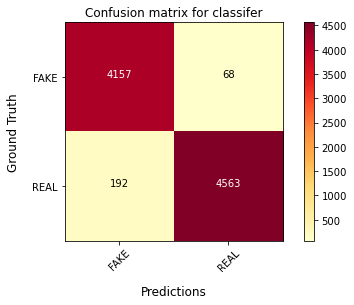

In [40]:
# Display confusion matrix of model on the vectorized data
cm = metrics.confusion_matrix(y_test_vec, pred_vec)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [41]:
# Display accuracy metrics of model on the tfidf data
print("\033[1mAccuracy metrics of BernoulliNB on the tfidf data\033[0m")
acc_metrics(y_test_tfidf, pred_tfidf)

Accuracy metrics of BernoulliNB on the tfidf data
Accuracy:   0.971047
Recall:     0.959621
Precision:  0.985316
F1 score:   0.972299


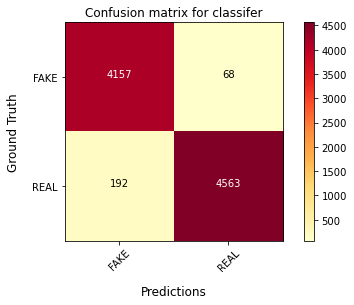

In [42]:
# Display confusion matrix of model on the tfidf data
cm = metrics.confusion_matrix(y_test_tfidf, pred_tfidf)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

For a first run without any hyperparameter tuning, BernoulliNB has done a very good job. It has quite oddly performed identically on both sets of vectorized and tfidf data achieving an <b>accuracy of 97%, recall of 96% and precision of 98%</b>.

This has already easily <b>beaten both or simple 'dumb baseline'</b> of 55% <b>as well as the higher baseline</b> (accuracy: 93.15%, precision: 92.65%, recall: 95.71%) of research done in the field on more advanced news predictors.

While we have already beaten our baselines, it is doubtful this is the best result we can achieve so we will continue testing other models to compare results. Next we will continue with the probability based classifiers to the Multinomial NB classifier to see if we can achieve better results.

#### Multinomial Naive Bayes Model

In [43]:
# Create and train MultinomialNB model

mnb = MultinomialNB().fit(x_train_vec, y_train_vec)
pred_vec = mnb.predict(x_test_vec)
print('Accuracy on test set for count vec. : ', mnb.score(x_test_vec, y_test_vec))
mnb = MultinomialNB().fit(x_test_tfidf, y_test_tfidf)
pred_tfidf = mnb.predict(x_test_tfidf)
print('Accuracy on test set for tfidf vec. : ', mnb.score(x_test_tfidf, y_test_tfidf))

Accuracy on test set for count vec. :  0.9530066815144767
Accuracy on test set for tfidf vec. :  0.9417594654788418


In [44]:
# Display accuracy metrics of model on the vectorized data
print("\033[1mAccuracy metrics of MultinomialNB on the vectorized data\033[0m")
acc_metrics(y_test_vec, pred_vec)

Accuracy metrics of MultinomialNB on the vectorized data
Accuracy:   0.953007
Recall:     0.937960
Precision:  0.972313
F1 score:   0.954828


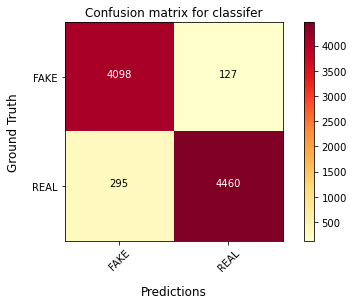

In [45]:
# Display confusion matrix of model on the vectorized data
cm = metrics.confusion_matrix(y_test_vec, pred_vec)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [46]:
# Display accuracy metrics of model on the tfidf data
print("\033[1mAccuracy metrics of MultinomialNB on the tfidf data\033[0m")
acc_metrics(y_test_tfidf, pred_tfidf)

Accuracy metrics of MultinomialNB on the tfidf data
Accuracy:   0.941759
Recall:     0.934175
Precision:  0.954858
F1 score:   0.944403


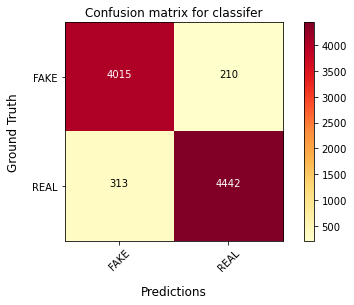

In [47]:
# Display confusion matrix of model on the tfidf data
cm = metrics.confusion_matrix(y_test_tfidf, pred_tfidf)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

We can see the MultinomialNB classifier has also performed better on vectorized data than tfidf data. It also beat both of our baselines in all metrics however performed slightly worse than the BernoulliNB at each metric. While it may be possible to achieve higher results with model tuning, I will be taking the model with the highest base results at this stage, so will move forward with BernoulliNB for now.

#### <i>Linear based models</i>:

We will now move on to testing our linear model based classifiers: PassiveAggressiveClassifier, and LogisticRegression.

#### Passive Aggressive Classifier Model

In [48]:
# Create and train PassiveAggressiveClassifier model

PA_clf = PassiveAggressiveClassifier().fit(x_train_vec, y_train_vec)
pred_vec = PA_clf.predict(x_test_vec)
print('Accuracy on test set for count vec. : ', PA_clf.score(x_test_vec, y_test_vec))
PA_clf = PassiveAggressiveClassifier().fit(x_train_tfidf, y_train_tfidf)
pred_tfidf = PA_clf.predict(x_test_tfidf)
print('Accuracy on test set for tfidf vec. : ', PA_clf.score(x_test_tfidf, y_test_tfidf))

Accuracy on test set for count vec. :  0.9935412026726058
Accuracy on test set for tfidf vec. :  0.9933184855233853


In [49]:
# Display accuracy metrics of model on the vectorized data
print("\033[1mAccuracy metrics of PassiveAggressiveClassifier on the vectorized data\033[0m")
acc_metrics(y_test_vec, pred_vec)

Accuracy metrics of PassiveAggressiveClassifier on the vectorized data
Accuracy:   0.993541
Recall:     0.993691
Precision:  0.994109
F1 score:   0.993900


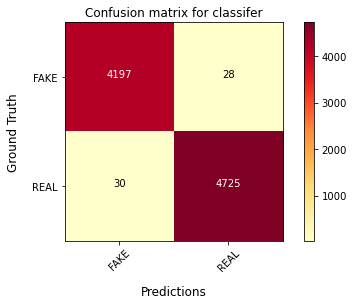

In [50]:
# Display confusion matrix of model on the vectorized data
cm = metrics.confusion_matrix(y_test_vec, pred_vec)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [51]:
# Display accuracy metrics of model on the tfidf data
print("\033[1mAccuracy metrics of PassiveAggressiveClassifier on the tfidf data\033[0m")
acc_metrics(y_test_tfidf, pred_tfidf)

Accuracy metrics of PassiveAggressiveClassifier on the tfidf data
Accuracy:   0.993318
Recall:     0.994322
Precision:  0.993069
F1 score:   0.993695


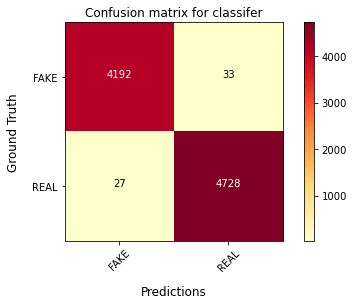

In [52]:
# Display confusion matrix of model on the tfidf data
cm = metrics.confusion_matrix(y_test_tfidf, pred_tfidf)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

The PassiveAggressiveClassifier model has absolutely smashed both baselines in all metrics achieving accuracy, recall, and precision all over 99% across the board. It performed slightly better on the vectorized data, although the difference is negligible at that stage. 

It's also done a noteworthy job at predicting fake news successful with a precision score of 99.4% correctly identifying 4266 fake stories while only misidentifying 26 cases. This is quite remarkable and particularly important to this study as identifying fake news successfully is the main goal.

I doubt we will be able to significantly beat these results but will none the less try the remaining models to see. 

#### Logistic Regression Classifier Model

In [53]:
# Create and train LogisticRegression model

lr_clf = LogisticRegression(random_state = 0, solver = 'liblinear').fit(x_train_vec, y_train_vec)
pred_vec = lr_clf.predict(x_test_vec)
print('Accuracy on test set for count vec. : ', lr_clf.score(x_test_vec, y_test_vec))
lr_clf = LogisticRegression(random_state = 0, solver = 'liblinear').fit(x_train_tfidf, y_train_tfidf)
pred_tfidf = lr_clf.predict(x_test_tfidf)
print('Accuracy on test set for tfidf vec. : ', lr_clf.score(x_test_tfidf, y_test_tfidf))

Accuracy on test set for count vec. :  0.99543429844098
Accuracy on test set for tfidf vec. :  0.9889755011135858


In [54]:
# Display accuracy metrics of model on the vectorized data
print("\033[1mAccuracy metrics of LogisticRegression on the vectorized data\033[0m")
acc_metrics(y_test_vec, pred_vec)

Accuracy metrics of LogisticRegression on the vectorized data
Accuracy:   0.995434
Recall:     0.995584
Precision:  0.995793
F1 score:   0.995688


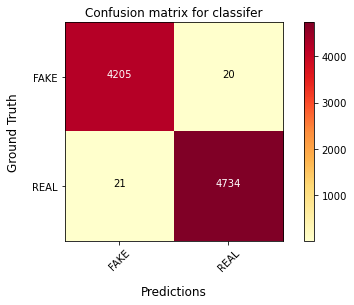

In [55]:
# Display confusion matrix of model on the vectorized data
cm = metrics.confusion_matrix(y_test_vec, pred_vec)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [56]:
# Display accuracy metrics of model on the tfidf data
print("\033[1mAccuracy metrics of LogisticRegression on the tfidf data\033[0m")
acc_metrics(y_test_tfidf, pred_tfidf)

Accuracy metrics of LogisticRegression on the tfidf data
Accuracy:   0.988976
Recall:     0.985068
Precision:  0.994058
F1 score:   0.989543


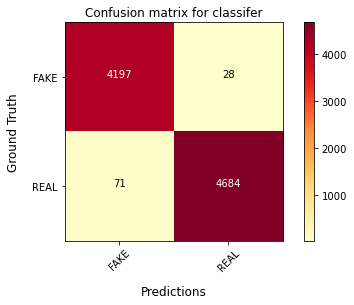

In [57]:
# Display confusion matrix of model on the tfidf data
cm = metrics.confusion_matrix(y_test_tfidf, pred_tfidf)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Remarkably, the PassiveAggressiveClassifier's results have immediately been beaten (slightly) by that of the LogisticRegression model. When tested on the vectorized test data it was able to average around <b>99.5% across the board in all metrics</b>. It has also achieved a slightly better result at classifying fake news while done considerably better at identifying real news stories.

It should be noted, its performance on tfidf data was worse than that of the PassiveAggressiveClassifier model. Performance on both sets is not required however, so I will move forward with the <b>LogisticRegression model as the new default</b>.

#### <i>Ensemble based models</i>:

Time now to test a few ensemble algorithms to see if they can achieve better than the already extremely high accuracy achieved on the test set. We will be trying the: Random Forest Classifier, and AdaBoost Classifier.

#### Random Forest Classifier Model

In [58]:
# Create and train RandomForestClassifier model

rf_clf = RandomForestClassifier(max_depth=4, random_state=0).fit(x_train_vec, y_train_vec)
pred_vec = rf_clf.predict(x_test_vec)
print('Accuracy on test set for count vec. : ', rf_clf.score(x_test_vec, y_test_vec))
rf_clf = RandomForestClassifier(max_depth=4, random_state=0).fit(x_train_tfidf, y_train_tfidf)
pred_tfidf = rf_clf.predict(x_test_tfidf)
print('Accuracy on test set for tfidf vec. : ', rf_clf.score(x_test_tfidf, y_test_tfidf))

Accuracy on test set for count vec. :  0.9817371937639198
Accuracy on test set for tfidf vec. :  0.9825167037861915


In [59]:
# Display accuracy metrics of model on the vectorized data
print("\033[1mAccuracy metrics of RandomForestClassifier on the vectorized data\033[0m")
acc_metrics(y_test_vec, pred_vec)

Accuracy metrics of RandomForestClassifier on the vectorized data
Accuracy:   0.981737
Recall:     0.966772
Precision:  0.998697
F1 score:   0.982475


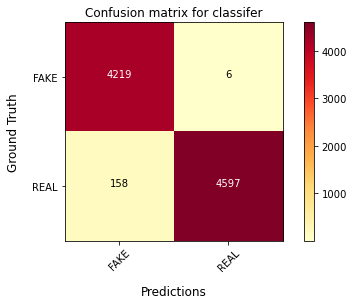

In [60]:
# Display confusion matrix of model on the vectorized data
cm = metrics.confusion_matrix(y_test_vec, pred_vec)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [61]:
# Display accuracy metrics of model on the tfidf data
print("\033[1mAccuracy metrics of RandomForestClassifier on the tfidf data\033[0m")
acc_metrics(y_test_tfidf, pred_tfidf)

Accuracy metrics of RandomForestClassifier on the tfidf data
Accuracy:   0.982517
Recall:     0.969506
Precision:  0.997404
F1 score:   0.983257


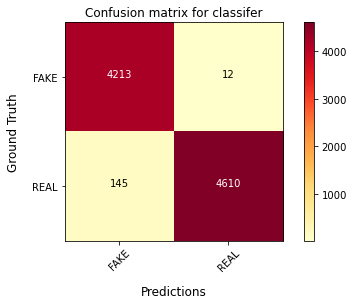

In [62]:
# Display confusion matrix of model on the tfidf data
cm = metrics.confusion_matrix(y_test_tfidf, pred_tfidf)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

The RandomForestClassifier based model has done extremely well at predicting fake news correctly with a precision score of 99.8% correctly identifying 4284 cases to just 8 misidentified. 

It was however less successful at classifying real news, leading to an overall accuracy of 98.5%. 

I will consider this performance worse as a whole than that of the LogisticRegression model due to the 131 misclassifications it made on real news and stick with the LogisticRegression model for now as, while identifying fake news is the main goal, it's also important to identify real news correctly too to avoid discounting too many real news stories. If however finding fake news is the only goal, this is so far the best classifier for it.

#### AdaBoost Classifier Model

In [63]:
# Create and train AdaBoostClassifier model

Ada = AdaBoostClassifier().fit(x_train_vec, y_train_vec)
pred_vec = Ada.predict(x_test_vec)
print('Accuracy on test set for count vec. : ', Ada.score(x_test_vec, y_test_vec))
Ada = AdaBoostClassifier().fit(x_train_tfidf, y_train_tfidf)
pred_tfidf = Ada.predict(x_test_tfidf)
print('Accuracy on test set for tfidf vec. : ', Ada.score(x_test_tfidf, y_test_tfidf))

Accuracy on test set for count vec. :  0.9966592427616926
Accuracy on test set for tfidf vec. :  0.9963251670378619


In [64]:
# Display accuracy metrics of model on the vectorized data
print("\033[1mAccuracy metrics of AdaBoostClassifier on the vectorized data\033[0m")
acc_metrics(y_test_vec, pred_vec)

Accuracy metrics of AdaBoostClassifier on the vectorized data
Accuracy:   0.996659
Recall:     0.995794
Precision:  0.997893
F1 score:   0.996842


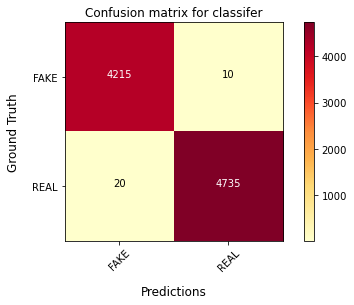

In [65]:
# Display confusion matrix of model on the vectorized data
cm = metrics.confusion_matrix(y_test_vec, pred_vec)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [66]:
# Display accuracy metrics of model on the tfidf data
print("\033[1mAccuracy metrics of AdaBoostClassifier on the tfidf data\033[0m")
acc_metrics(y_test_tfidf, pred_tfidf)

Accuracy metrics of AdaBoostClassifier on the tfidf data
Accuracy:   0.996325
Recall:     0.996004
Precision:  0.997053
F1 score:   0.996528


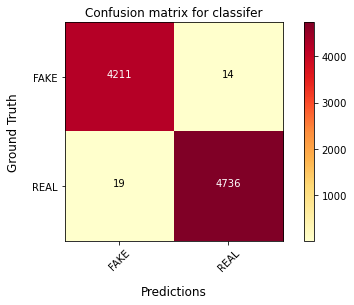

In [67]:
# Display confusion matrix of model on the tfidf data
cm = metrics.confusion_matrix(y_test_tfidf, pred_tfidf)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Finally, our AdaBoostClassifier based model has also achieved extremely high metric results on the test set. It performed particularly well of the vectorized data scoring and accuracy of 99.6%, recall of 99.6%, and precision of 99.7%, to very slightly beat the former high of 99.5% by LogisticRegression. While these numbers are very close, it's 0.2% precision score from better classification on fake news gave it only 14 misclassifications of fake news compared to 24 for LogisticRegression.


#### Our best model on the test set

Overall, the AdaBoostClassifier based model has achieved the best results on the test set as well as the highest precision level, resulting in it being the most accurate overall classifier. It was able to <b>easily beat both the dumb baseline</b> of guessing the most prominent class (52% accuracy) as well as <b>beating the more advanced baseline</b> (accuracy: 93.15%, precision: 92.65%, recall: 95.71%) set in comparison to a variety of published deep learning models created based on a variety of more advanced factors in predicting fake news in datasets.

In this regard, the model has been a fantastic success, even without hypertuning or weighting classes to help identify fake news successfully. However, it should be noted that <b>these results are results on the test set</b>. While this data was kept separate from the training data at all times, it is important to note that is comes from the same source as the training data. 

With this in mind, all we can say at this point is that the model performs very well on the test data. The question remains, <b>does the model generalize well?</b>

To answer this, I am going to <b>test it on an entirely new fake news dataset</b><sup>[11]</sup> which it has not been exposed to at all. If the model is truly successful (can generalize to new data), it should be able to perform in a fairly similar result when exposed to this new data.

#### Create second dataset to test model on

In [68]:
# import second dataset to see if model can generalize on 
news_test = pd.read_csv('fake_or_real_news.csv')

In [69]:
# check new datset head
news_test.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [70]:
# Change labels from FAKE and REAL to 1 and 0
news_test.loc[news_test.label == 'FAKE', 'label'] = int(1)
news_test.loc[news_test.label == 'REAL', 'label'] = int(0)
news_test['label'] = news_test['label'].astype(int)

In [71]:
# Check it was successful
news_test.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",1
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",1
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,0
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,0
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,0


In [72]:
# View numbers of each category
print("Number of real news stories:", len(news_test[news_test.label==0]))
print("Number of fake news stories:", len(news_test[news_test.label==1]))

Number of real news stories: 3171
Number of fake news stories: 3164


In [73]:
## Run same text normalization process on the new dataset
## Text normalization

# Create counter with stopwords (note: without a counter, run time is exponential)
stopwords_dict = Counter(stopwords.words('english'))
# Create lemmatizer
lemmatizer = WordNetLemmatizer()
# Empty list to store cleaned data
new_corpus = []

for i in range(0, len(news_test)):
    # Replace all non-letters with ' '
    cleaned_text = re.sub('[^a-zA-Z]', ' ', news_test['text'][i])
    # Change text to lowercase
    cleaned_text = cleaned_text.lower()
    # Split text for lemmatization
    cleaned_text = cleaned_text.split()
    # Lemmatize and remove stopwords 
    cleaned_text = [lemmatizer.lemmatize(j) for j in cleaned_text if not j in stopwords_dict]
    # Rejoin individual words to sentences 
    cleaned_text = ' '.join(cleaned_text)
    # Append sentences to corpus
    new_corpus.append(cleaned_text)

In [74]:
# Set y values from labels
y = np.array(news_test.iloc[:,-1])
y

array([1, 1, 0, ..., 1, 0, 0])

#### Count vectorizer new dataset

In [75]:
# Vectorize titles into ngrams
new_vec_corpus = count_vectorizer.transform(new_corpus).toarray()

In [76]:
# Check vectorization ran as expected
print(new_vec_corpus.shape)
new_vec_corpus

(6335, 1000)


array([[0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Now that the new dataset has been preprocessed, it is time to run it through our model to see if it can successfully beat our baselines.

## III Conclusions

### 9. Evaluation

For the evaluation, we will test our best model on the test dataset and compare to the second best to decide our final choice.

#### Run predictions with most successful model - AdaBoostClassifier

In [77]:
# Make predictions on new dataset using the AdaBoostClassifier model and see results.
new_preds = Ada.predict(new_vec_corpus)
print('Accuracy on new data with the AdaBoostClassifier model: ', Ada.score(new_vec_corpus, y))

Accuracy on new data with the AdaBoostClassifier model:  0.5243883188634569


AdaBoostClassifier has performed extremely poorly when exposed to new data. The result is actually more or less equal to a coin-toss. It has failed to even beat the results of our dumbbaseline of 52%. 

So what went wrong? To understand this, we need to investigate the metrics further.

In [78]:
# Display accuracy metrics of the model on new dataset
print("\033[1mAccuracy metrics of AdaBoostClassifier on the vectorized data\033[0m")
acc_metrics(y, new_preds)

Accuracy metrics of AdaBoostClassifier on the vectorized data
Accuracy:   0.524388
Recall:     0.959229
Precision:  0.512756
F1 score:   0.668281


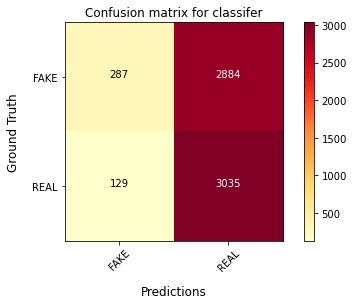

In [79]:
# Display confusion matrix of model on the new dataset predictions
cm = metrics.confusion_matrix(y, new_preds)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

On closer examination, we can see what's gone wrong. The model has failed to adapt to the new dataset. It has predicted  the answer of 'real' almost every time accounting for 5429 of it's 6335 predictions.

Will all of our classifiers perform this badly when exposed to new data? To check, we can try our next most successful model, the LogisticRegression model.

#### Run predictions with next most successful model - LogisticRegression

In [80]:
# Make predictions on new dataset using the LogisticRegression model and see results.
new_preds = lr_clf.predict(new_vec_corpus)
print('Accuracy on test set for count vec. : ', lr_clf.score(new_vec_corpus, y))

Accuracy on test set for count vec. :  0.6996053670086819


The immediate results suggest a great improvement in the performance of our second most successful model. It has <b>managed to beat the dumb baseline</b> of 52%.

In [81]:
# Display accuracy metrics of the model on new dataset
print("\033[1mAccuracy metrics of LogisticRegression on the new vectorized data\033[0m")
acc_metrics(y, new_preds)

Accuracy metrics of LogisticRegression on the new vectorized data
Accuracy:   0.699605
Recall:     0.583439
Precision:  0.759358
F1 score:   0.659875


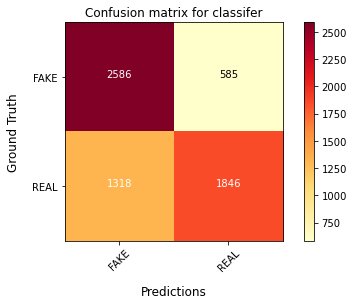

In [82]:
# Display confusion matrix of model on the new dataset predictions
cm = metrics.confusion_matrix(y, new_preds)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

The LogisticRegression model performed when significantly better when exposed to the new data, achieving a reasonable accuracy of 69.7%, and also classified fake news more successfully with a precision of 75%.

It <b>now seems the LogisticRegression  model is our best classifier</b> when exposing it to new data.

As a final check for completeness, given the differences between our first two, I will check the final classifier with 99% metrics, the PassiveAggressiveClassifier model, to see how it performs.

#### Run predictions with third most successful model - PassiveAggressiveClassifier

In [83]:
# # Make predictions on new dataset using the PassiveAggressiveClassifier model and see results.
new_preds = PA_clf.predict(new_vec_corpus)
print('Accuracy on test set for count vec. : ', PA_clf.score(new_vec_corpus, y))

Accuracy on test set for count vec. :  0.6855564325177584


In [84]:
# Display accuracy metrics of the model on new dataset
print("\033[1mAccuracy metrics of PassiveAggressiveClassifier on the new vectorized data\033[0m")
acc_metrics(y, new_preds)

Accuracy metrics of PassiveAggressiveClassifier on the new vectorized data
Accuracy:   0.685556
Recall:     0.556574
Precision:  0.749362
F1 score:   0.638738


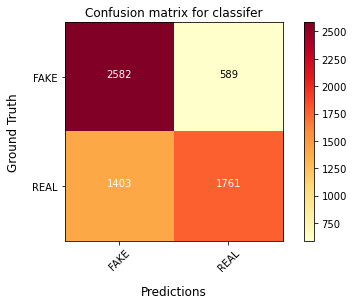

In [85]:
# Display confusion matrix of model on the new dataset predictions
cm = metrics.confusion_matrix(y, new_preds)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

The results are very similar to that of the LogisticRegression model (accuracy: 70%, precision: 76.4%). It has performed marginally better overall, while proving a little better at classifying fake news. 

Given the aims of the classifier were to both identify news overall successfully as well as specifically identify fake news, the <b>PassiveAggressiveClassifier based model been our best model when exposed to new data</b>.

In [86]:
# Saving our chosen model and creating requirements.txt for reproducability by others
import pickle
pickle.dump(PA_clf, open('PassiveAggressive_FakeNewsClassifier.sav', 'wb'))

# A requirements.txt file should also be generated through cmd line
#pip3 freeze > requirements.txt

### 10. Summary and conclusions

#### Summary and basline comparison

Several models were created which perform exceptionally well on the test set, scoring over 99% across all metrics. In regards to building a model which classifies well on the test set, this has been a huge success. However, when exposed to new data, the models have failed to generalize to the same level, performing significantly worse. This was particularly true of the AdaBoostClassifier model, which produced results comparable to flipping a coin and failed to even beat the dumb baseline.

The other two models, the LogisticRegression and PassiveAggressiveClassifier, fared significantly better, both performing around the 70% accuracy mark and 75-76% precision mark, indicating they performed well on fake news. They were both able to <b>beat our dumb baseline</b> of guessing the most prominent class by a significant margin, but were conversely <b>well short of the secondary baseline</b> set by comparison to industry experts.

#### Final choice and contribution to the problem area

While the model's ability to generalize in a little disappointing, the <b>PassiveAggressiveClassifier model was chosen as our best model to move forward with in contributing to the problem area</b> due to its slightly better performance overall and on fake news classification. While not entirely accurate, it could be used as an indicator or perhaps combined as a weak learner in an ensemble model for more accurate results.

#### Reproducibility and deployment

The <b>approach used can be repeated simply by importing the saved model and recreating the environment</b> from the requirements.txt file, which can be made freely available. As the model has been pickled Python would need to be used and the same Python environment will likely be needed if used within other projects, which is a limitation for wide spread use. However, <b>deployment via an API</b> such as <a href='https://fastapi.tiangolo.com/'>FastAPI</a> or <a href='https://streamlit.io/'>Streamlit</a> will allow for this <b>model to be used by anyone</b> with an internet connection. 

#### Ideas for future improvement and model development

As seen, the model performed well on the test set but failed to generalize well. This could be due to differences in the datasets (sources, news topics etc.). Combining the two datasets used and retraining the model is likely to improve model performance significantly. 

The model was also not hyperparameter tuned. With careful tuning, the model is likely to produce better results. 

Finally, for optimal performance, training a deep neural network is another potential solution which could perform better than our current model.

### 11. References

<p><sup>[1]</sup> Meschi. M. et al. (2020), 'The real-world effects of ‘fake news’ – and how to quantify them', Tech Law for Everyone, https://www.scl.org/articles/12022-the-real-world-effects-of-fake-news-and-how-to-quantify-them - assessed 21-11-2021</p>
<p><sup>[2]</sup> European Commission, 'Coronavirus: EU strengthens action to tackle disinformation', press release, 10 June 2020, https://ec.europa.eu/commission/presscorner/detail/en/ip_20_1006 - assessed 21-11-2021</p>
<p><sup>[3]</sup> Dunn. A. G. et al. (2017), 'Mapping information exposure on social media to explain differences in HPV vaccine coverage in the United States', Vaccine, Volume 35, Issue 23, https://www.sciencedirect.com/science/article/pii/S0264410X17305522?via%3Dihub - assessed 21-11-2021</p>
<p><sup>[4]</sup> Fisher. M. et al., The Washington Post, 'Pizzagate: From rumor, to hashtag, to gunfire in D.C.', news article, December 6 2016, https://www.washingtonpost.com/local/pizzagate-from-rumor-to-hashtag-to-gunfire-in-dc/2016/12/06/4c7def50-bbd4-11e6-94ac-3d324840106c_story.html - assessed 21-11-2021</p>
<p><sup>[5]</sup> https://www.pewresearch.org/fact-tank/2017/11/02/more-americans-are-turning-to-multiple-social-media-sites-for-news/ - assessed 21-11-2021</p>
<p><sup>[6]</sup> https://blog.twitter.com/en_us/topics/product/2020/updating-our-approach-to-misleading-information - assessed 21-11-2021</p>
<p><sup>[7]</sup> Allen. J. et al. (2020), 'Evaluating the fake news problem at the scale of the information ecosystem', Sciences Advanced, Volume. 6, No. 14, https://www.science.org/doi/10.1126/sciadv.aay3539# - assessed 21-11-2021</p>
<p><sup>[8]</sup> Shu. K. et. al, (2017), 'Fake News Detection on Social Media: A Data Mining Perspective', ACM SIGKDD Explorations Newsletter. 19. 10.1145/3137597.3137600., https://dl.acm.org/doi/abs/10.1145/3137597.3137600 - assessed 21-11-2021</p>
<p><sup>[9]</sup>  Center for Information Technology and Society at UC Santa Barbara, 'The Danger of Fake News in Inflaming or Suppressing Social Conflict', article, undated, University of California Santa Barbara, https://www.cits.ucsb.edu/fake-news/danger-social - assessed 21-11-2021</p>
<p><sup>[10]</sup> Information security and object technology (ISOT) research lab, 'Fake News Detection Datasets', https://www.uvic.ca/ecs/ece/isot/datasets/fake-news/index.php, University of Victoria, Engineering and Computer Science Department - assessed 21-11-2021</p>
<p><sup>[11]</sup> Amin. H, 'Fake News, Balanced dataset for fake news analysis', dataset, https://www.kaggle.com/hassanamin/textdb3- accessed 30-12-2021</p>
<p><sup>[12]</sup> Naik. K. 'Fake-News-Classifier', https://github.com/krishnaik06/Fake-News-Classifier, Github repository, Apr 11, 2020 - accessed 12-12-2021</p>
<p><sup>[13]</sup> Kaliyar. R.K. et al. (2021), 'EchoFakeD: Improving fake news detection in social media with an efficient deep neural network', Neural Computing and Applications, 33 , https://link.springer.com/article/10.1007/s00521-020-05611-1 - accessed 12-12-2021</p>
<p><sup>[14]</sup> Shu K. et al. (2019), 'Defend: explainable fake news detection', https://www.researchgate.net/publication/332864316_dEFEND_Explainable_Fake_News_Detection - accessed 12-12-2021 </p>
<p><sup>[15]</sup> Zhou X. et al. (2020), 'SAFE: similarity-aware multi-modal fake news detection', Data Lab, EECS Department, Syracuse University, https://arxiv.org/abs/2003.04981 - accessed 12-12-2021</p>
<p><sup>[16]</sup> Islam N. et al. (2021), 'Ternion: An Autonomous Model for Fake News Detection', Applied Sciences 11, no. 19: 9292. https://doi.org/10.3390/app11199292, https://www.mdpi.com/2076-3417/11/19/9292 - accessed 12-12-2021</p>
<p><sup>[17]</sup> Dutta M. (2021), 'Bag-of-words vs TFIDF vectorization – A Hands-on Tutorial', article, July 14, 2021, https://www.analyticsvidhya.com/blog/2021/07/bag-of-words-vs-tfidf-vectorization-a-hands-on-tutorial/Sciences - accessed 13-12-2021</p>